In [1]:
import pandas as pd

# Load your original dataset
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/Copy of faqs_data.csv")
df

,Question,Answer,Source
0,Can I return items?,"Once sold we have a no return, no refund polic...",https://kingscollection.co.ke/faqs/
1,Can I place my order over email or phone?,Definitely! Any order with Kingâ€™s is treated...,https://kingscollection.co.ke/faqs/
2,I didnâ€™t receive my order,Sorry about that! Please call +254 703 444 444...,https://kingscollection.co.ke/faqs/
3,How much is the delivery fee?,"300/= within Nairobi, 600/= within Kenya- deli...",https://kingscollection.co.ke/faqs/
4,How long will it take to receive my order?,We work hard to ensure you get exactly what yo...,https://kingscollection.co.ke/faqs/
...,...,...,...
398,What payment options are available?,We offer four main payment options: M-PESA on ...,https://shopzetu.com/pages/faqs
399,How long is delivery time?,Deliveries within Nairobi take between 24 â€“ ...,https://shopzetu.com/pages/faqs
400,What happens if am not in when my order arrives?,Someone needs to be in when your parcel is due...,https://shopzetu.com/pages/faqs
401,"An item you delivered is faulty, what should i...",We want to sort out any issues with faulty ite...,https://shopzetu.com/pages/faqs


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/Copy of faqs_data.csv")

# 1. Show column names and data types
print("📌 Columns and Data Types:\n")
print(df.dtypes)

# 2. Show the shape of the dataset (rows, columns)
print("\n📌 Shape of Dataset:")
print(df.shape)

# 3. Show the first 5 rows
print("\n📌 First 5 Rows:\n")
print(df.head())


📌 Columns and Data Types:

Question    object
Answer      object
Source      object
dtype: object

📌 Shape of Dataset:
(403, 3)

📌 First 5 Rows:

                                     Question  \
0                         Can I return items?   
1   Can I place my order over email or phone?   
2                 I didnâ€™t receive my order   
3               How much is the delivery fee?   
4  How long will it take to receive my order?   

                                              Answer  \
0  Once sold we have a no return, no refund polic...   
1  Definitely! Any order with Kingâ€™s is treated...   
2  Sorry about that! Please call +254 703 444 444...   
3  300/= within Nairobi, 600/= within Kenya- deli...   
4  We work hard to ensure you get exactly what yo...   

                                Source  
0  https://kingscollection.co.ke/faqs/  
1  https://kingscollection.co.ke/faqs/  
2  https://kingscollection.co.ke/faqs/  
3  https://kingscollection.co.ke/faqs/  
4  https://kingsc

In [3]:
print("\n📌 Dataset Overview:\n")
df.info()



📌 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  403 non-null    object
 1   Answer    403 non-null    object
 2   Source    403 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


In [6]:
# Show all rows where either 'Question' or 'Answer' is missing
missing_rows = df[df['Question'].isnull() | df['Answer'].isnull()]
print(missing_rows)
df = df.dropna(subset=['Question', 'Answer'])



Empty DataFrame
Columns: [Question, Answer, Source]
Index: []


In [7]:
import pandas as pd
from googletrans import Translator

# Load dataset
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/Copy of faqs_data.csv")

# Initialize translator
translator = Translator()

# Function to safely translate, skipping missing values
def safe_translate(text, dest='sw'):
    if pd.isnull(text):
        return ""
    try:
        return translator.translate(str(text), dest=dest).text
    except Exception as e:
        print(f"Translation error for text: {text} - {e}")
        return ""

# Translate columns safely
df['Question_Swahili'] = df['Question'].apply(lambda x: safe_translate(x, dest='sw'))
df['Answer_Swahili'] = df['Answer'].apply(lambda x: safe_translate(x, dest='sw'))

# Shengifier
def shengify(text):
    replacements = {
        "unaweza": "unaeza",
        "habari": "niaje",
        "sawa": "poa",
        "rafiki": "budah",
        "siku": "day",
        "chakula": "chow",
        "pesa": "doe",
        "saa": "time",
        "karibu": "fiti",
        "hapana": "buda no"
    }
    for sw, sh in replacements.items():
        text = text.replace(sw, sh)
    return text

# Apply Shengifier
df['Question_Sheng'] = df['Question_Swahili'].apply(shengify)
df['Answer_Sheng'] = df['Answer_Swahili'].apply(shengify)

# Save new file
df.to_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_data_with_sheng.csv", index=False)

print("✅ Translation complete.")


Translation error for text: Can I decide to not pay through Myntra Credit, even though I might have amount available? - The read operation timed out
Translation error for text: What happens if I need to return something I purchased with my Gift Card? - timed out
Translation error for text: Myntra's returns and exchange policy gives you an option to return or exchange items purchased on Myntra for any reason within the specified return/exchange period (check product details page for the same) Returns will be picked from the same address where the product is delivered. Feel free to try on a product but all we ask is that the product remains unused and is preserved in its original condition along with the tags and packaging. In case a Seal Tag is received with the item, ensure that it remains attached & intact with the product to avoid any hassles in the event of a return/exchange. There are two ways to return the product to us:
Pick up: In most locations, we offer a free pick up service.

In [66]:
# preprocessing of data
# Load the updated dataset
import pandas as pd

df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_data_with_sheng.csv")
print(df.head())


                                     Question  \
0                         Can I return items?   
1   Can I place my order over email or phone?   
2                 I didnâ€™t receive my order   
3               How much is the delivery fee?   
4  How long will it take to receive my order?   

                                              Answer  \
0  Once sold we have a no return, no refund polic...   
1  Definitely! Any order with Kingâ€™s is treated...   
2  Sorry about that! Please call +254 703 444 444...   
3  300/= within Nairobi, 600/= within Kenya- deli...   
4  We work hard to ensure you get exactly what yo...   

                                Source  \
0  https://kingscollection.co.ke/faqs/   
1  https://kingscollection.co.ke/faqs/   
2  https://kingscollection.co.ke/faqs/   
3  https://kingscollection.co.ke/faqs/   
4  https://kingscollection.co.ke/faqs/   

                                    Question_Swahili  \
0                          Je! Ninaweza kurudi vitu?   
1  

In [67]:
#Check for null values
print(df.isnull().sum())


Question            0
Answer              0
Source              0
Question_Swahili    2
Answer_Swahili      9
Question_Sheng      2
Answer_Sheng        9
dtype: int64


In [78]:
#. Drop rows with missing data
df.dropna(inplace=True)
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 Question            0
Answer              0
Source              0
Question_Swahili    0
Answer_Swahili      0
Question_Sheng      0
Answer_Sheng        0
Cleaned_Question    0
Cleaned_Answer      0
Question_Length     0
Answer_Length       0
dtype: int64


In [69]:
#Lowercase text 
df['Question'] = df['Question'].str.lower()
df['Answer'] = df['Answer'].str.lower()
df['Question_Swahili'] = df['Answer_Swahili'].str.lower()
df['Question_Sheng'] = df['Answer_Sheng'].str.lower()



In [70]:
# Remove punctuation
import string

df['Question'] = df['Question'].str.translate(str.maketrans('', '', string.punctuation))
# Repeat for other question columns if needed


Tips Before Model Training
If your model supports multi-language input, you can merge all question variants (English, Swahili, Sheng) for training.

You may create a column like:
df['Combined_Questions'] = df['Question'] + " " + df['Swahili_Question'] + " " + df['Sheng_Question']



In [113]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [31]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[

True

In [52]:
print(df.columns)


Index(['Question', 'Answer', 'Source', 'Question_Swahili', 'Answer_Swahili',
       'Question_Sheng', 'Answer_Sheng'],
      dtype='object')


In [71]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# --- Swahili Stopwords (manually added) ---
swahili_stopwords = set([
    'na', 'ya', 'ni', 'kwa', 'wa', 'si', 'hii', 'hiyo', 'kama', 'ndiyo',
    'katika', 'hapo', 'kule', 'bila', 'cha', 'kila', 'ambaye', 'ambao'
])

# --- Sheng Stopwords / Common Filler Words (you can expand this list) ---
sheng_stopwords = set([
    'ati', 'sasa', 'buda', 'msee', 'dem', 'manze', 'si', 'ndo', 'apo',
    'vile', 'buda', 'nani', 'kwani', 'aje', 'gava', 'brathe'
])

# --- English Stopwords ---
english_stopwords = set(stopwords.words('english'))

# Combine all stopwords
all_stopwords = english_stopwords.union(swahili_stopwords).union(sheng_stopwords)

# --- Lemmatizer ---
lemmatizer = WordNetLemmatizer()

# --- Custom Preprocessing Function ---
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in all_stopwords]
    
    # Lemmatize (only for English-compatible words)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoin tokens into cleaned text
    return ' '.join(tokens)

# --- Load your dataset ---
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_data_with_sheng.csv")

# --- Apply preprocessing ---
df['Cleaned_Question'] = df['Question'].apply(preprocess_text)
df['Cleaned_Answer'] = df['Answer'].apply(preprocess_text)

# --- Save cleaned dataset ---
df.to_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv", index=False)

print("Preprocessing complete and saved to faqs_cleaned_multilingual.csv")


Preprocessing complete and saved to faqs_cleaned_multilingual.csv


In [132]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")
#Check for null values
print(df.isnull().sum())


Question            0
Answer              0
Source              0
Question_Swahili    2
Answer_Swahili      9
Question_Sheng      2
Answer_Sheng        9
Cleaned_Question    0
Cleaned_Answer      0
dtype: int64


In [134]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")

# Create a new DataFrame without missing values
df_clean = df.dropna()

print("\nMissing values per column:\n", df_clean.isnull().sum())



Missing values per column:
 Question            0
Answer              0
Source              0
Question_Swahili    0
Answer_Swahili      0
Question_Sheng      0
Answer_Sheng        0
Cleaned_Question    0
Cleaned_Answer      0
dtype: int64


In [151]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")

# Create a new DataFrame without missing values
df_clean = df.dropna()

# Save the clean DataFrame to a new CSV file
df_clean.to_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual_nomissing.csv", index=False)

print("\nMissing values per column:\n", df_clean.isnull().sum())
print("Cleaned dataset without missing values saved as 'faqs_cleaned_multilingual_nomissing.csv'")


Missing values per column:
 Question            0
Answer              0
Source              0
Question_Swahili    0
Answer_Swahili      0
Question_Sheng      0
Answer_Sheng        0
Cleaned_Question    0
Cleaned_Answer      0
dtype: int64
Cleaned dataset without missing values saved as 'faqs_cleaned_multilingual_nomissing.csv'


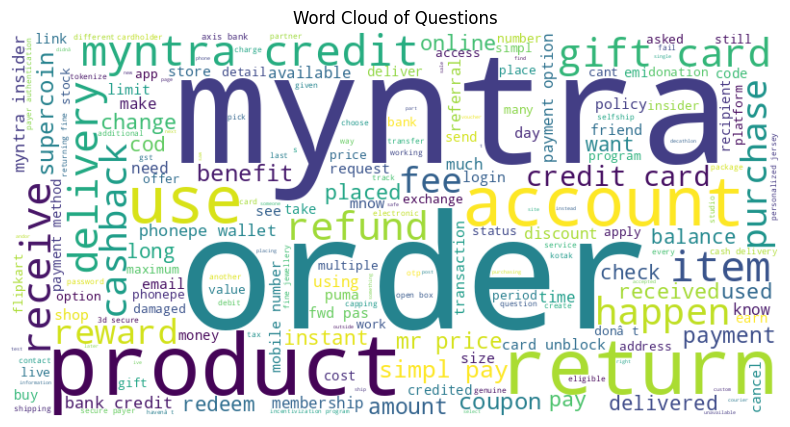

In [144]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")

# Create a new DataFrame without missing values
df_clean = df.dropna()

# Step 2: Exploratory Data Analysis (EDA)
# Plot word cloud for questions using the cleaned DataFrame
question_text = ' '.join(df_clean['Cleaned_Question'])
wordcloud_q = WordCloud(width=800, height=400, background_color='white').generate(question_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_q, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Questions')
plt.show()

This word cloud visualizes the most common words found in our cleaned questions dataset. The larger and bolder a word appears, the more frequently it occurs in our questions. For example, words like "order," "product," "return," "my," "account," and "use" are the most prominent, showing that these topics are central in our FAQs. This suggests that many of our questions focus on orders, products, returns, accounts, and usage processes. Less frequent words appear smaller, but together, the word cloud gives us a quick overview of the main themes and concerns in our data.

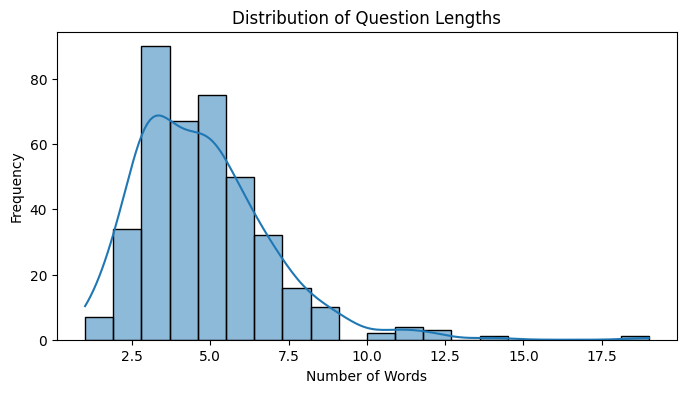

In [145]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")
# Question length distribution
df_clean['Question_Length'] = df_clean['Cleaned_Question'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Question_Length'], bins=20, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of question lengths in our cleaned dataset, measured by the number of words in each question. Most of our questions are short, typically containing between 3 and 7 words, with the highest frequency around 3 to 5 words. As the number of words increases, the frequency of questions decreases, meaning we have fewer long questions. This suggests that our FAQ questions are generally concise and to the point, which is common for customer queries.

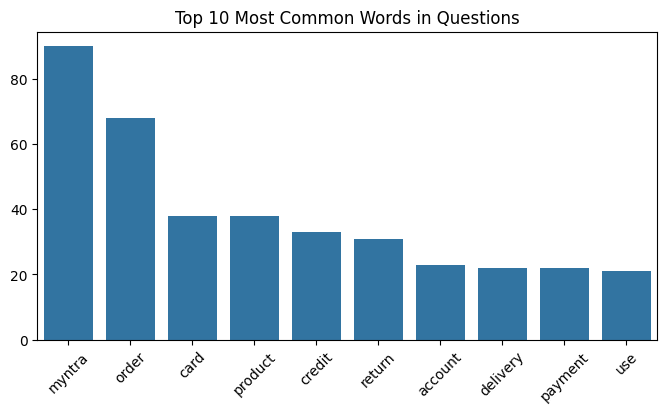

In [146]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")

# Top 10 most frequent words in questions
from collections import Counter
all_words = ' '.join(df_clean['Cleaned_Question']).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 Most Common Words in Questions")
plt.xticks(rotation=45)
plt.show()

This bar chart displays the top 10 most common words found in our cleaned questions. The word "myntra" appears most frequently, followed by "order," "card," "product," and "credit." Other frequent words include "return," "account," "delivery," "payment," and "use." This indicates that our questions are mainly focused on topics related to orders, products, payments, returns, and account management. These are the key areas of concern or interest for users in our FAQ dataset.

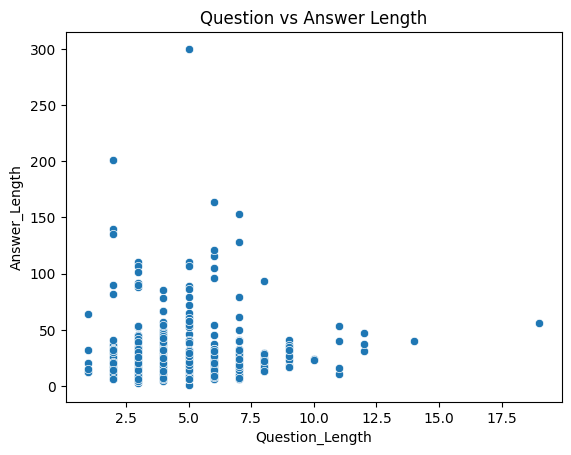

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")

# Create Question_Length and Answer_Length columns
df_clean['Question_Length'] = df_clean['Cleaned_Question'].apply(lambda x: len(str(x).split()))
df_clean['Answer_Length'] = df_clean['Cleaned_Answer'].apply(lambda x: len(str(x).split()))

# Plot
sns.scatterplot(x='Question_Length', y='Answer_Length', data=df_clean)
plt.title('Question vs Answer Length')
plt.show()


This scatter plot shows the relationship between the length of our questions and the length of our answers, measured by the number of words in each. We can see that most questions are short, typically between 3 and 8 words, while answer lengths vary much more widely. Many answers are relatively short, but some are quite long, even for short questions. There is no strong correlation between question length and answer length—short questions can have both short and long answers. This suggests that even simple questions in our FAQ dataset may require detailed explanations, while longer questions do not always result in longer answers.

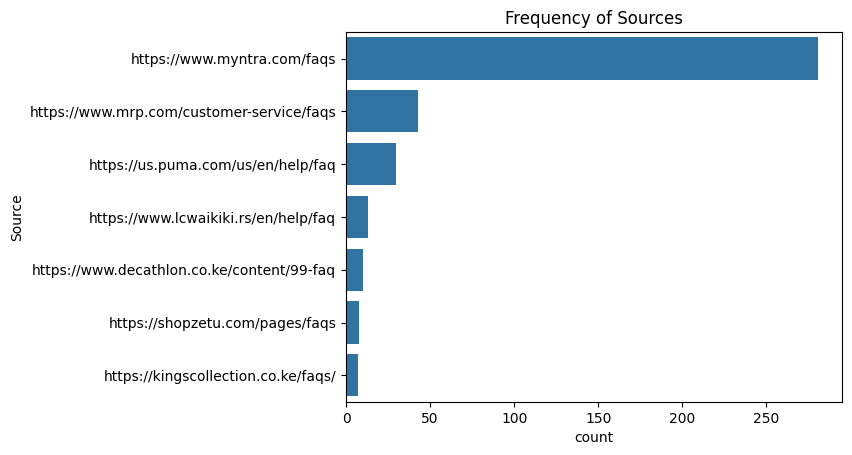

In [148]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")

sns.countplot(y='Source', data=df_clean, order=df_clean['Source'].value_counts().index)
plt.title('Frequency of Sources')
plt.show()


This bar chart shows the frequency of different sources in our cleaned dataset. The majority of our questions come from "https://www.myntra.com/faqs," which is by far the most common source. Other sources, such as "https://www.mrp.com/customer-service/faqs" and "https://us.puma.com/us/en/help/faq," contribute significantly fewer questions. The remaining sources have only a small number of questions each. This indicates that our dataset is dominated by FAQs from Myntra, with other sources playing a much smaller role in the overall data.

# Validation of data set

In [149]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")
# Step 3: Data Validation

print("\nNumber of duplicate rows:", df_clean.duplicated().sum())


Number of duplicate rows: 0


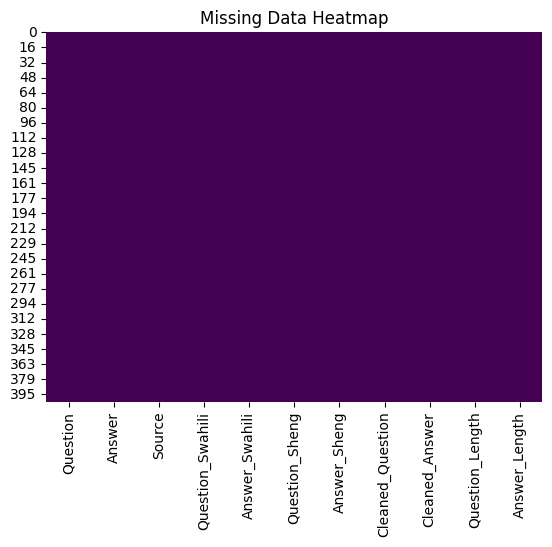

In [150]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


The heatmap titled "Missing Data Heatmap" shows that our dataset has no missing values in any of the columns. Each cell in the heatmap is filled (no bright or white lines), which means every row for every column is complete. This indicates our data is clean and ready for further analysis or modeling.

In [106]:
import pandas as pd

# Always load the cleaned dataset for further analysis
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/project/faqs_cleaned_multilingual.csv")
# List all unique sources
print(df['Source'].unique())


['https://kingscollection.co.ke/faqs/'
 'https://us.puma.com/us/en/help/faq'
 'https://www.decathlon.co.ke/content/99-faq'
 'https://www.lcwaikiki.rs/en/help/faq'
 'https://www.mrp.com/customer-service/faqs' 'https://www.myntra.com/faqs'
 'https://shopzetu.com/pages/faqs']


According to the code, the validation of the data includes the following checks:

Missing Values: The code checks for missing values and removes any rows with missing data using df_clean = df.dropna(). It also prints the count of missing values per column to confirm that none remain.

Duplicates: The code checks for duplicate rows in the cleaned dataset using df_clean.duplicated().sum() and prints the number of duplicates.

Visualization of Missing Data: A heatmap is generated (sns.heatmap(df_clean.isnull(), ...)) to visually confirm that there are no missing values in any column.

These steps ensure that the dataset is clean, with no missing or duplicate entries, and is ready for further analysis or modeling.